<a href="https://colab.research.google.com/github/odheL42/NSU-senior-project/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Подготовка и скачивание с github файлов

In [ ]:
!ssh-keygen -t rsa -b 4096 -f ~/.ssh/id_rsa -N ''

Generating public/private rsa key pair.
Created directory '/root/.ssh'.
Your identification has been saved in /root/.ssh/id_rsa
Your public key has been saved in /root/.ssh/id_rsa.pub
The key fingerprint is:
SHA256:zNyAvReIeZtRF1YycA7AzPrAymU8fqYILMfjlsaabds root@b224ede1816d
The key's randomart image is:
+---[RSA 4096]----+
|       +..+.Bo.  |
|       =+o * o   |
|     o+.* . .    |
|      O= B .     |
| o . = +S o      |
|. * o . +.       |
| = + . +         |
| oB.. .          |
|o=o.E            |
+----[SHA256]-----+


In [ ]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

# github.com:22 SSH-2.0-babeld-fdcea1d49


In [ ]:
!cat ~/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQCgsldLO9bYvJkTHHTKlVU/3ZOejSRZOGxte/Pa2kciAidJgvShyWG9rWN7h49sLpEb5irtfXsgWOT6lOr3VrgmZ16X5XTaF3/ciPIMQaO6tkSwb0oA2BNvr6PV6TcE/yaybNnkzmWSJpYffGSAS7/S6qicHFHd4BYvEDHX7okkCG4+uAKRbGLC12sK/ABrZz0KQ43jdjA70hwmNjWFDArd2K4to98uXkUhCcmYaglUph/bOph77N9o8uxel5FiUIv4N7wfW+G+Kj0z6ot50Ww4VHlhzMnZhxqnEkOgwKMh7SJzGFCDSqhkW1rU4o85EV7UGZW5bhb2nF88CPI4sg+KaKY8SkrMfeHHSn0mFpmDY1rcaBp3OSxE5/+wBPVbzxfCUyj6xLnXKRvdBPNOeZmAg3IgHtQAp6Stx3lYIRngXeldZLVSn8AqyCteV6Y0gxBZbxYLq6jTt+S3aAC5NJuXQPQEEqnu/xXD0gE/3aoHK2e+JO0wGivGwSQYvcHoYMQf71be4OgtFKQ/5WTvoZmitEXkANyZhMguB7AF/ZPrO9zov1IejRXkeNlE+vz8mO5x/JX2dFSvt70+FBp2kAl+zYA/Oc2HjWXSpdT6J13fz9lI+3naFBlp3ifCLP07GqnLnGMNoyaQAf4lb6lvJY4KuvvuUMhPlG+w6bZ9HhpNDQ== root@b224ede1816d


In [ ]:
!ssh -T git@github.com

Hi odheL42! You've successfully authenticated, but GitHub does not provide shell access.


In [ ]:
!git clone git@github.com:odheL42/NSU-senior-project.git frames

Cloning into 'frames'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 17 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (17/17), 8.37 KiB | 8.37 MiB/s, done.
Resolving deltas: 100% (4/4), done.


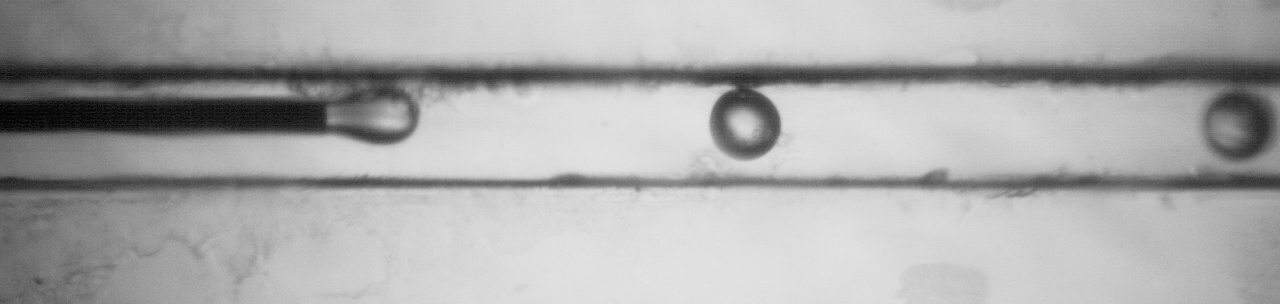

In [ ]:
from PIL import Image
Image.open('/content/drive/MyDrive/dataset_nsu_senProj/result/sample_video_img_0022.jpg')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Получение кадров из видео, сохранение их на github

In [1]:
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow
import glob
import numpy as np
import pandas as pd

https://note.nkmk.me/en/python-opencv-video-to-still-image/

In [ ]:


def save_all_frames(video_path, dir_path, basename, ext='jpg'):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        return

    os.makedirs(dir_path, exist_ok=True)
    base_path = os.path.join(dir_path, basename)

    digit = len(str(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))))

    n = 0

    while True:
        ret, frame = cap.read()

        if ret:
            frame_cut = frame[:, 325:]
            img = frame[86:170, 625:900]

            '''#увеличение резкости изображения
            kernel1 = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
            kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
            img = cv2.filter2D(img, -1, kernel)

            #медианный фильтр
            img  = cv2.medianBlur(img,5)
            rows = img.shape[0]
            circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, rows / 8,
                                        param1=100, param2=30,
                                        minRadius=1, maxRadius=30)


            if circles is not None:
                circles = np.uint16(np.around(circles))
                for i in circles[0, :]:
                    center = (i[0], i[1])
                    # circle center
                    cv2.circle(img, center, 1, (0, 100, 100), 3)
                    # circle outline
                    radius = i[2]
                    cv2.circle(img, center, radius, (255, 0, 255), 3)'''

            cv2.imwrite('{}_{}.{}'.format(base_path, str(n).zfill(digit), ext), img)
            n += 1
        else:
            return

save_all_frames('/content/drive/MyDrive/dataset_nsu_senProj/oil_0p05ml_water_0ml.avi', '/content/drive/MyDrive/dataset_nsu_senProj/result_cutted_2', 'sample_video_img')

#save_all_frames('/content/drive/MyDrive/dataset_nsu_senProj/oil_0p05ml_water_0ml.avi', '/content/drive/MyDrive/dataset_nsu_senProj/result_cutted', 'sample_video_img', 'png')


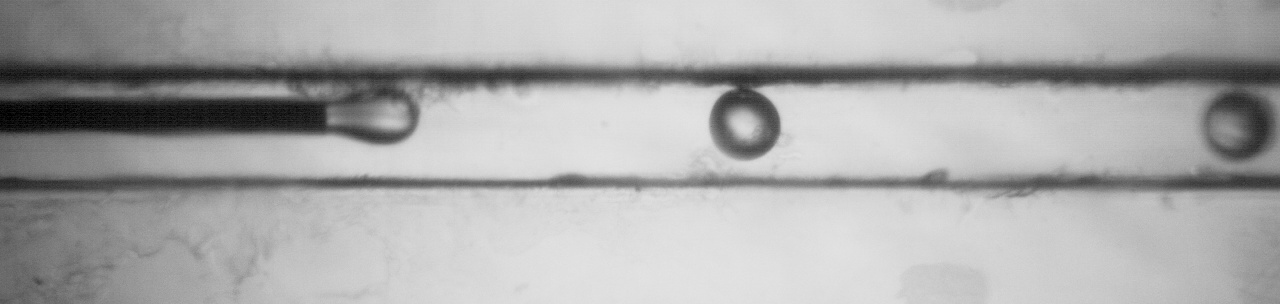

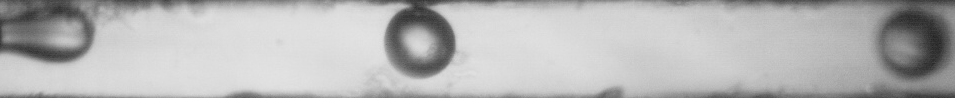

In [ ]:
from google.colab.patches import cv2_imshow
frame_to_cut = '/content/drive/MyDrive/dataset_nsu_senProj/result/sample_video_img_0000.jpg'
res = cv2.imread(frame_to_cut)
res1 = res[82:180, 325:]
#Image.open(frame_to_cut)
print('\n')
cv2_imshow(res)
cv2_imshow(res1)

# Обраротка кадра (стандарт)

original image


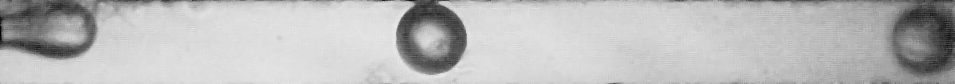

result image


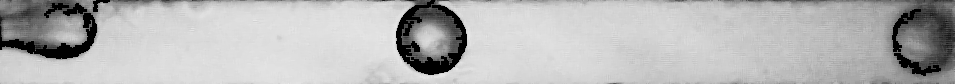

поиск окружностей с помощью  HoughCircles()


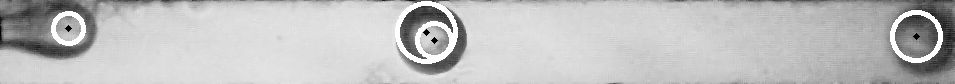

In [ ]:
img = cv2.imread('/content/drive/MyDrive/dataset_nsu_senProj/result/sample_video_img_0700.jpg', 0)
img = img[86:170, 325:]

#увеличение резкости изображения
kernel1 = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
img = cv2.filter2D(img, -1, kernel)

#медианный фильтр
img  = cv2.medianBlur(img,5)


#закрашиваем блики
thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,  cv2.THRESH_BINARY, 11, 2) # Адаптивное пороговое значение для выделения бликов

thresh_inv = cv2.bitwise_not(thresh) # Инверсия изображения, чтобы блики стали белыми

kernel = np.ones((3, 3), np.uint8)
cleaned = cv2.morphologyEx(thresh_inv, cv2.MORPH_OPEN, kernel)# Применение морфологической операции открытия для удаления мелких шумов
contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # Нахождение контуров бликов
result = img.copy() # Копируем оригинальное изображение для закрашивания бликов

# Закрашиваем все блики (и внутренние области) черным цветом
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 50:  # Фильтруем слишком маленькие участки (шумы)
        # Закрашивание всей области внутри контура черным цветом
        cv2.drawContours(result, [contour], -1, (0, 0, 0), thickness=cv2.FILLED)


#results
print("original image")
cv2_imshow(img)
print("result image")
cv2_imshow(result)

#поищем окружности
print("поиск окружностей с помощью  HoughCircles()")
rows = img.shape[0]
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, rows / 8,
                            param1=100, param2=30,
                            minRadius=1, maxRadius=30)


if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(img, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(img, center, radius, (255, 0, 255), 3)


cv2_imshow(img)

Поиск контуров (+-)

In [ ]:
img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
img =

# тестирую фильтры для обработки изображений

https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d

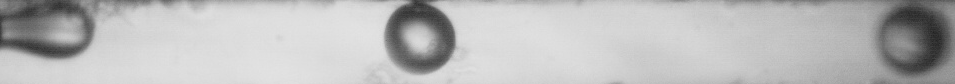

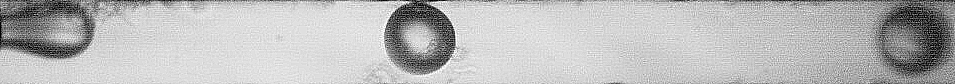

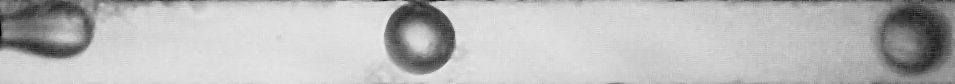

поиск окружностей с помощью  HoughCircles()


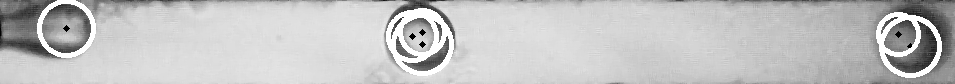

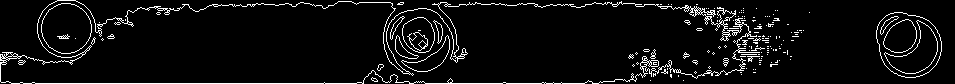

In [ ]:
import cv2

img = cv2.imread('/content/drive/MyDrive/dataset_nsu_senProj/result/sample_video_img_0000.jpg', 0)
img = img[86:170, 325:]
cv2_imshow(img)

#увеличение резкости изображения
kernel1 = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
img = cv2.filter2D(img, -1, kernel)
cv2_imshow(img)
median_image = img

# CLAHE (Contrast Limited Adaptive Histogram Equalization)
'''clahe = cv2.createCLAHE(clipLimit=3., tileGridSize=(8,8))

lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)  # convert from BGR to LAB color space
l, a, b = cv2.split(lab)  # split on 3 different channels

l2 = clahe.apply(l)  # apply CLAHE to the L-channel

lab = cv2.merge((l2,a,b))  # merge channels
img2 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  # convert from LAB to BGR
cv2_imshow(img2)'''


#медианный фильтр
median_image  = cv2.medianBlur(img,5)
cv2_imshow(median_image)

#черный и белый
#ret, median_image = cv2.threshold(median_image, 111, 255, 0)
#cv2_imshow(median_image)


#поищем окружности
print("поиск окружностей с помощью  HoughCircles()")
rows = median_image.shape[0]
circles = cv2.HoughCircles(median_image, cv2.HOUGH_GRADIENT, 1, rows / 8,
                            param1=100, param2=30,
                            minRadius=1, maxRadius=30)


if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(median_image, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(median_image, center, radius, (255, 0, 255), 3)


cv2_imshow(median_image)

#поищем контур
img_grey = median_image
#зададим порог
thresh = 200

#получим картинку, обрезанную порогом
ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)

#надем контуры
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#создадим пустую картинку
img_contours = np.zeros(median_image.shape)

#отобразим контуры
cv2.drawContours(img_contours, contours, -1, (255,255,255), 1)

cv2_imshow(img_contours) # выводим итоговое изображение в окно

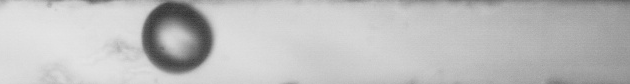

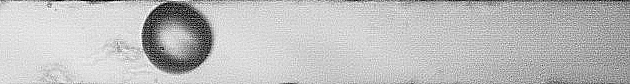

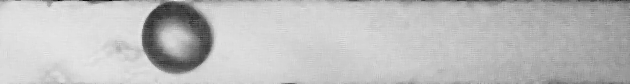

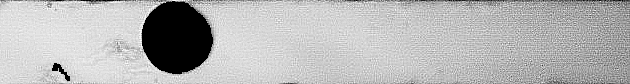

поиск окружностей с помощью  HoughCircles()


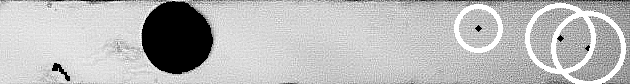

In [ ]:
#пробуем закрасить блики
img = cv2.imread('/content/drive/MyDrive/dataset_nsu_senProj/result_cutted/sample_video_img_4977.jpg', cv2.IMREAD_GRAYSCALE)
img = img[86:170, 325:]
cv2_imshow(img)

#увеличение резкости изображения
kernel1 = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
img = cv2.filter2D(img, -1, kernel)
cv2_imshow(img)
median_image = img

#медианный фильтр
median_image  = cv2.medianBlur(img,5)
cv2_imshow(median_image)
imgGPT = median_image

# Адаптивное пороговое значение для выделения бликов
thresh = cv2.adaptiveThreshold(imgGPT, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                               cv2.THRESH_BINARY, 11, 2)

# Инверсия изображения, чтобы блики стали белыми
thresh_inv = cv2.bitwise_not(thresh)

# Применение морфологической операции открытия для удаления мелких шумов
kernel = np.ones((3, 3), np.uint8)
cleaned = cv2.morphologyEx(thresh_inv, cv2.MORPH_OPEN, kernel)

# Нахождение контуров бликов
contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Копируем оригинальное изображение для закрашивания бликов
result = img.copy()

# Закрашиваем все блики (и внутренние области) черным цветом
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 50:  # Фильтруем слишком маленькие участки (шумы)
        # Закрашивание всей области внутри контура черным цветом
        cv2.drawContours(result, [contour], -1, (0, 0, 0), thickness=cv2.FILLED)

cv2_imshow(result)

median_image = result
#поищем окружности
print("поиск окружностей с помощью  HoughCircles()")
rows = median_image.shape[0]
circles = cv2.HoughCircles(median_image, cv2.HOUGH_GRADIENT, 1, rows / 8,
                            param1=100, param2=30,
                            minRadius=20, maxRadius=40)


if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(median_image, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(median_image, center, radius, (255, 0, 255), 3)


cv2_imshow(median_image)

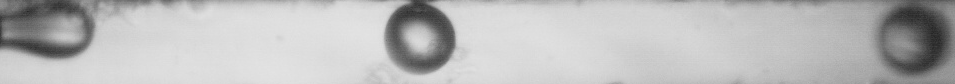

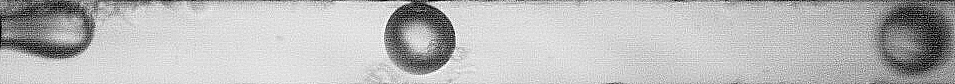

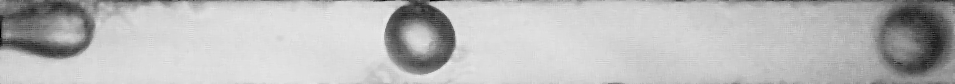

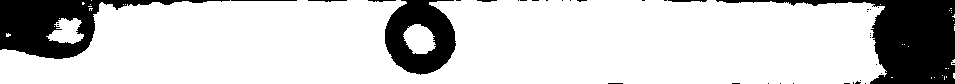

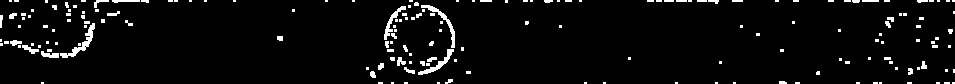

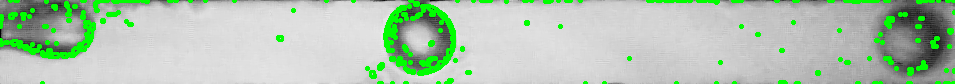

поиск окружностей с помощью  HoughCircles()


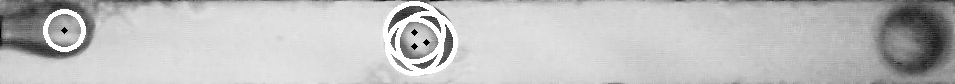

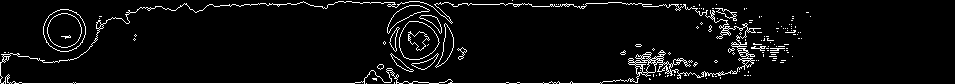

In [ ]:
import cv2

img = cv2.imread('/content/drive/MyDrive/dataset_nsu_senProj/result/sample_video_img_0001.jpg', 0)
img = img[86:170, 325:]
cv2_imshow(img)

#увеличение резкости изображения
kernel1 = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
img = cv2.filter2D(img, -1, kernel)
cv2_imshow(img)
median_image = img




# CLAHE (Contrast Limited Adaptive Histogram Equalization)
'''clahe = cv2.createCLAHE(clipLimit=3., tileGridSize=(8,8))

lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)  # convert from BGR to LAB color space
l, a, b = cv2.split(lab)  # split on 3 different channels

l2 = clahe.apply(l)  # apply CLAHE to the L-channel

lab = cv2.merge((l2,a,b))  # merge channels
img2 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  # convert from LAB to BGR
cv2_imshow(img2)'''


#медианный фильтр
median_image  = cv2.medianBlur(img,5)
cv2_imshow(median_image)
imgGPT = median_image

ret3,th3 = cv2.threshold(imgGPT,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2_imshow( th3)
# Адаптивное пороговое значение для получения бинарного изображения
thresh = cv2.adaptiveThreshold(imgGPT, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2)

# Применение морфологической операции открытия для удаления бликов
kernel = np.ones((3, 3), np.uint8)
opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
cv2_imshow(opened)

# Поиск контуров
contours, _ = cv2.findContours(opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Отрисовка контуров на исходном изображении
result = cv2.cvtColor(imgGPT, cv2.COLOR_GRAY2BGR)
cv2.drawContours(result, contours, -1, (0, 255, 0), 2)

# Отображение результата
cv2_imshow( result)

#черный и белый
#ret, median_image = cv2.threshold(median_image, 111, 255, 0)
#cv2_imshow(median_image)


#поищем окружности
print("поиск окружностей с помощью  HoughCircles()")
rows = median_image.shape[0]
circles = cv2.HoughCircles(median_image, cv2.HOUGH_GRADIENT, 1, rows / 8,
                            param1=100, param2=30,
                            minRadius=1, maxRadius=30)


if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(median_image, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(median_image, center, radius, (255, 0, 255), 3)


cv2_imshow(median_image)

#поищем контур
img_grey = median_image
#зададим порог
thresh = 200

#получим картинку, обрезанную порогом
ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)
#надем контуры
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#создадим пустую картинку
img_contours = np.zeros(median_image.shape)
#отобразим контуры
cv2.drawContours(img_contours, contours, -1, (255,255,255), 1)

cv2_imshow(img_contours) # выводим итоговое изображение в окно





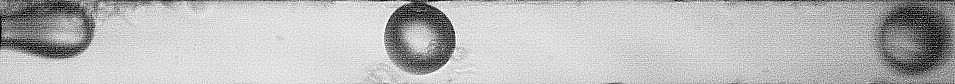

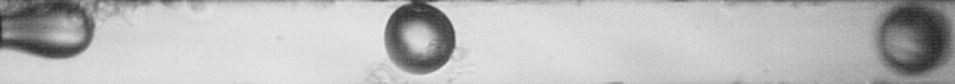

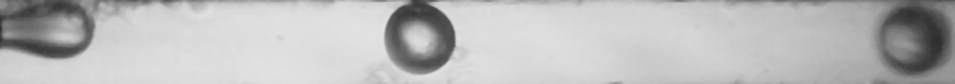

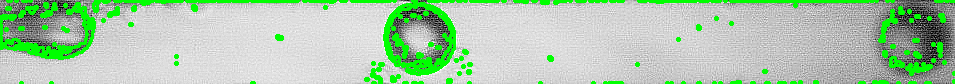

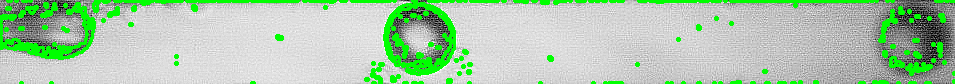


 pepe


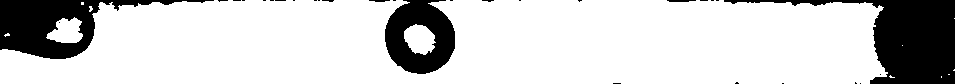

In [ ]:
import cv2
import numpy as np

# Загрузка изображения
img = cv2.imread('/content/drive/MyDrive/dataset_nsu_senProj/result_cutted_and_processed/sample_video_img_0001.jpg', cv2.IMREAD_GRAYSCALE)


#увеличение резкости изображения
kernel1 = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
img = cv2.filter2D(img, -1, kernel)
cv2_imshow(img)

# Применение фильтра Гаусса для сглаживания бликов
blurred = cv2.GaussianBlur(img, (5, 5), 0)

#медианный фильтр
median_image  = cv2.medianBlur(blurred,1)
cv2_imshow(median_image)
imgGPT = median_image
median_image  = cv2.medianBlur(blurred,5)
cv2_imshow(median_image)


# Адаптивное пороговое значение для получения бинарного изображения
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2)
thresh1 = cv2.adaptiveThreshold(imgGPT, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2)

# Применение морфологической операции открытия для удаления бликов
kernel = np.ones((3, 3), np.uint8)
opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
opened1 = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)
# Поиск контуров
contours, _ = cv2.findContours(opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours1, _ = cv2.findContours(opened1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Отрисовка контуров на исходном изображении
result = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
result1 = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(result, contours, -1, (0, 255, 0), 2)
cv2.drawContours(result1, contours1, -1, (0, 255, 0), 2)

# Отображение результата
cv2_imshow( result)
cv2_imshow( result1)


print("\n pepe")
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2_imshow( th3)


https://stackoverflow.com/questions/35854197/how-to-use-opencvs-connectedcomponentswithstats-in-python



https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html


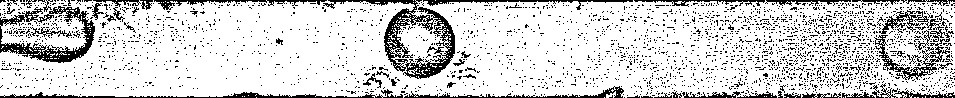

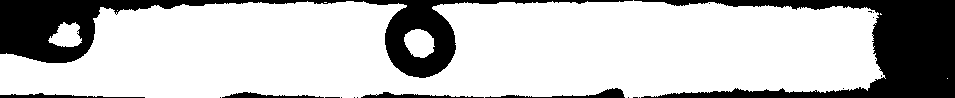

[[537.30182076  41.37159438]
 [461.39328661  50.97255307]
 [325.           2.        ]
 [117.          10.        ]
 [880.33333333  13.66666667]
 [ 66.30472855  35.39579685]
 [419.04797601  42.70164918]
 [947.          78.        ]]


In [ ]:
frame_to_cut = '/content/drive/MyDrive/dataset_nsu_senProj/result/sample_video_img_0000.jpg'
frame = cv2.imread(frame_to_cut, 0)
img = frame[82:180, 325:]

ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

####################
pepe = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
####################

# You need to choose 4 or 8 for connectivity type
connectivity = 4
# Perform the operation
output = cv2.connectedComponentsWithStats(thresh, connectivity, cv2.CV_32S)
# Get the results
# The first cell is the number of labels
num_labels = output[0]
# The second cell is the label matrix
labels = output[1]
# The third cell is the stat matrix
stats = output[2]
# The fourth cell is the centroid matrix
centroids = output[3]

cv2_imshow(pepe)
cv2_imshow(thresh)
print(centroids)

#Детектирование капель, определение их контура (стандарт)

In [91]:
import numpy as np
import cv2
data=[]
idx=-1
output_csv = '/content/drive/MyDrive/dataset_nsu_senProj/result_cutted_2/droplet_parameters_minRadius20_try.csv'

for file in glob.glob('/content/drive/MyDrive/dataset_nsu_senProj/result_cutted_2/*.jpg'):
    #img = img[86:170, 325:900]
    idx+=1
    img = cv2.imread(file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    blurred = cv2.medianBlur(gray, 25) #cv2.bilateralFilter(gray,10,50,50)
    #увеличение резкости изображения
    kernel1 = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    img = cv2.filter2D(img, -1, kernel)

    #медианный фильтр
    img  = cv2.medianBlur(img,5)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = gray

    minDist = 100
    param1 = 30 #500
    param2 = 20 #200 #smaller value-> more false circles
    minRadius = 22
    maxRadius = 45 #10



    # docstring of HoughCircles: HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]]) -> circles
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0,:]:
            cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)

    data.append({
            'Frame Number': idx,
            'Radius (px)': i[2],
            'Diameter (mm)': i[2]*2*0.011
        })
df = pd.DataFrame(data)
df.to_csv(output_csv, index=False)

print(f"Данные сохранены в {output_csv}")
'''# Show result for testing:
cv2_imshow(img)
print(i[2]*2*0.011)
print(i[2])'''

Данные сохранены в /content/drive/MyDrive/dataset_nsu_senProj/result_cutted_2/droplet_parameters_minRadius20_try.csv


'# Show result for testing:\ncv2_imshow(img)\nprint(i[2]*2*0.011)\nprint(i[2])'

In [ ]:
df = pd.DataFrame(data)
output_csv = '/content/drive/MyDrive/dataset_nsu_senProj/result_cutted_1/droplet_parameters.csv'
df.to_csv(output_csv, index=False)

print(f"Данные сохранены в {output_csv}")

Данные сохранены в /content/drive/MyDrive/dataset_nsu_senProj/result_cutted_1/droplet_parameters.csv


In [100]:
df = pd.read_csv(output_csv)
df.head()
test = df.mean(axis='index')
print(test)
min = df.min(axis='index')
print(min)
max= df.max(axis='index')
print(max)

Frame Number     2500.000000
Radius (px)        35.410118
Diameter (mm)       0.779023
dtype: float64
Frame Number      0.000
Radius (px)      27.000
Diameter (mm)     0.594
dtype: float64
Frame Number     5000.000
Radius (px)        44.000
Diameter (mm)       0.968
dtype: float64


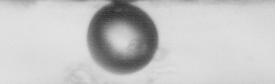

In [65]:
test_img = cv2.imread('/content/drive/MyDrive/dataset_nsu_senProj/result_cutted_2/sample_video_img_0168.jpg')
cv2.circle(test_img, (i[0], i[1]), 35, (0, 255, 0), 1)
cv2_imshow(test_img)

After that, the
resulting value of dm in pixels is multiplied by a scale factor of 0,011
mm/pixel to obtain a diameter in mm.

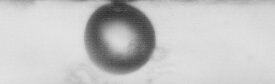

In [ ]:
img = cv2.imread('/content/drive/MyDrive/dataset_nsu_senProj/result/sample_video_img_0001.jpg')
img = img[86:170, 625:900]
cv2_imshow(img)

# Готовим картинки для yolo

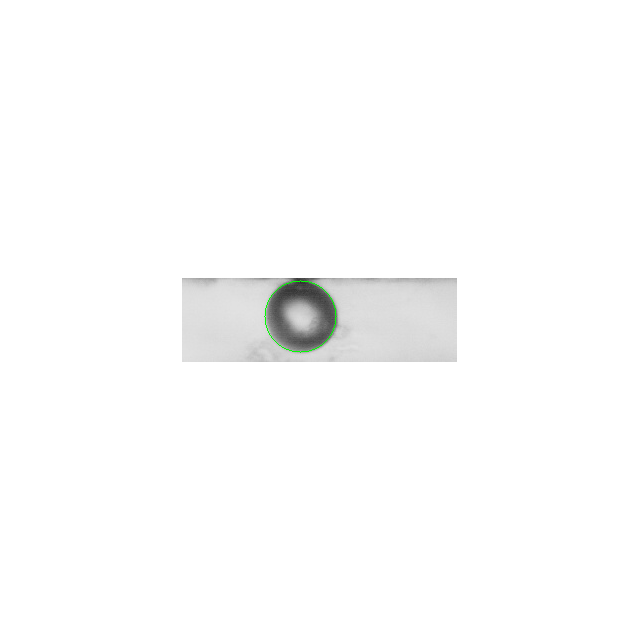

[[[300 316  36]]]
0.7919999999999999
36


In [116]:
img = cv2.imread('/content/drive/MyDrive/dataset_nsu_senProj/result_cutted_2/sample_video_img_0168.jpg')
#img = img[86:170, 325:900]
img = cv2.imread('/content/test_yoloPreprocessing.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#blurred = cv2.medianBlur(gray, 25) #cv2.bilateralFilter(gray,10,50,50)
#увеличение резкости изображения
kernel1 = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
#img = cv2.filter2D(img, -1, kernel)

#медианный фильтр
#img  = cv2.medianBlur(img,5)

#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = gray

minDist = 100
param1 = 30 #500
param2 = 35 #200 #smaller value-> more false circles
minRadius = 22
maxRadius = 100 #10



# docstring of HoughCircles: HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]]) -> circles
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 1)

cv2_imshow(img)
print(circles)
print(i[2]*2*0.011)
print(i[2])

In [ ]:
print(i[2]*2*0.011)
print(circles)

0.7699999999999999
[[[436  38  35]]]


Instead of having to fiddle with choosing the right parameters with cv2.HoughCircles, here's an alternative approach using contour filtering. The idea is to obtain a binary image with Otsu's threshold then perform morphological operations to isolate elliptical shaped contours. Finally we find contours and filter using aspect ratio and contour area. Here's the results:

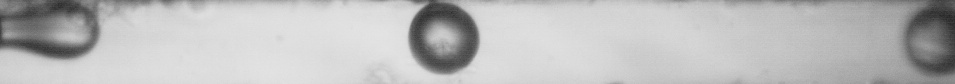

465.0
491.0
64033.5


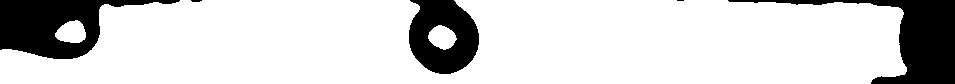

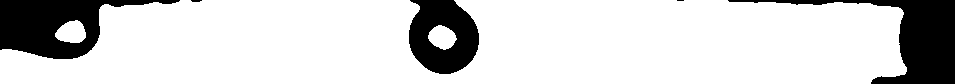

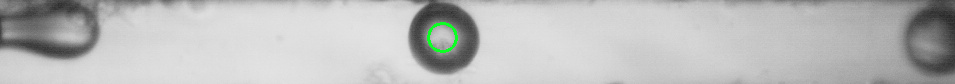

In [ ]:
image = cv2.imread('/content/drive/MyDrive/dataset_nsu_senProj/result_cutted_and_processed/sample_video_img_4978.jpg')
cv2_imshow(image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.medianBlur(gray, 11)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Morph open
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

# Find contours and filter using contour area and aspect ratio
cnts = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.04 * peri, True)
    area = cv2.contourArea(c)
    print(area)
    if len(approx) > 5 and area > 1 and area < 5000000:
        ((x, y), r) = cv2.minEnclosingCircle(c)
        cv2.circle(image, (int(x), int(y)), int(r), (36, 255, 12), 2)



cv2_imshow(thresh)
cv2_imshow(opening)
cv2_imshow( image)


In [58]:
from PIL import Image
im = Image.open("/content/drive/MyDrive/dataset_nsu_senProj/result_cutted_2/sample_video_img_0000.jpg")
(width, height) = im.size
print(im.size)

(275, 84)


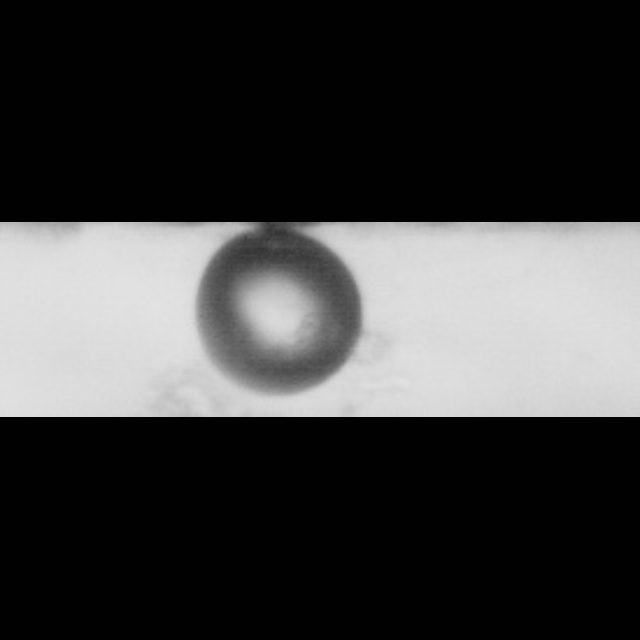

In [92]:
import cv2
import numpy as np

# Загрузка изображения
image = cv2.imread('/content/drive/MyDrive/dataset_nsu_senProj/result_cutted_2/sample_video_img_0000.jpg')

# Определение текущих размеров изображения
height, width = image.shape[:2]

# Заданные размеры
target_size = 640

# Рассчитываем соотношение сторон исходного изображения
aspect_ratio = width / height

# Если изображение шире
if width > height:
    new_width = target_size
    new_height = int(new_width / aspect_ratio)
else:
    new_height = target_size
    new_width = int(new_height * aspect_ratio)

# Изменение размера изображения с сохранением пропорций
resized_image = cv2.resize(image, (new_width, new_height))

# Создание нового изображения с заданными размерами и заполнение черным цветом (или другим цветом)
result_image = np.ones((target_size, target_size, 3), dtype=np.uint8)

# Вычисление отступов для центрирования изображения
x_offset = (target_size - new_width) // 2
y_offset = (target_size - new_height) // 2

# Помещаем измененное изображение в центр
result_image[y_offset:y_offset + new_height, x_offset:x_offset + new_width] = resized_image

# Сохранение итогового изображения
cv2.imwrite('resized_image.png', result_image)

# Вывод результата
cv2_imshow( result_image)

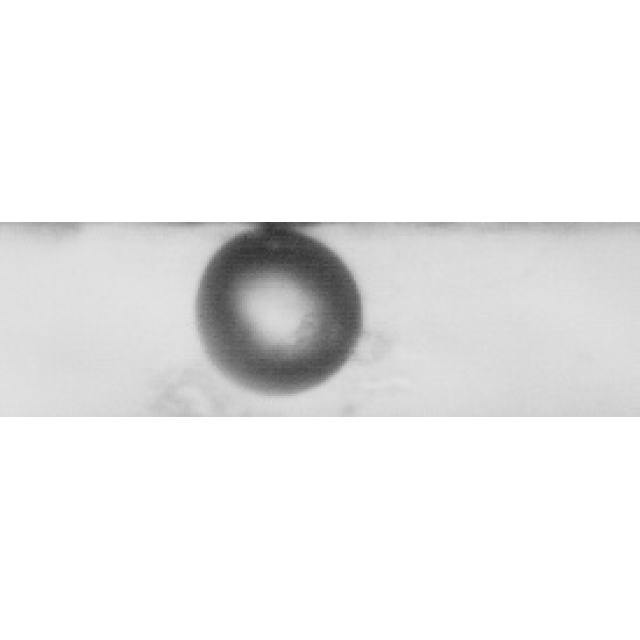

In [95]:
import cv2
import numpy as np

# Загрузка изображения
image = cv2.imread('/content/drive/MyDrive/dataset_nsu_senProj/result_cutted_2/sample_video_img_0000.jpg')

# Проверка, удалось ли загрузить изображение
if image is None:
    raise ValueError("Не удалось загрузить изображение. Проверьте путь к файлу.")

# Определение текущих размеров изображения
height, width = image.shape[:2]

# Заданные размеры
target_size = 640

# Рассчитываем соотношение сторон исходного изображения
aspect_ratio = width / height

# Определяем новые размеры, сохраняя пропорции
if width > height:
    new_width = target_size
    new_height = int(new_width / aspect_ratio)
else:
    new_height = target_size
    new_width = int(new_height * aspect_ratio)

# Изменение размера изображения с сохранением пропорций
resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

# Создание нового изображения с заданными размерами и заполнение белым цветом
# Белый цвет в BGR: (255, 255, 255)
result_image = np.ones((target_size, target_size, 3), dtype=np.uint8) * 255

# Вычисление отступов для центрирования изображения
x_offset = (target_size - new_width) // 2
y_offset = (target_size - new_height) // 2

# Помещаем измененное изображение в центр
result_image[y_offset:y_offset + new_height, x_offset:x_offset + new_width] = resized_image

# Сохранение итогового изображения
cv2.imwrite('resized_image_white_padding.png', result_image)

# Вывод результата
cv2_imshow(result_image)


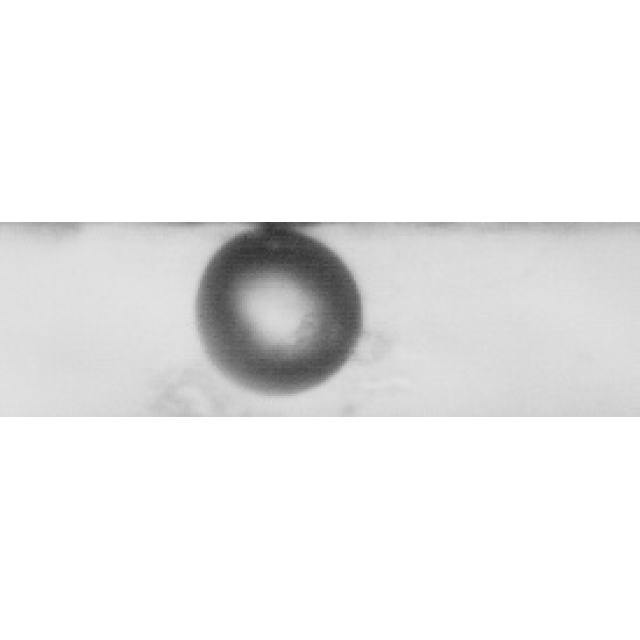

(84, 275)
(640, 640)


In [106]:
import cv2
import numpy as np

# Загрузка изображения
image = cv2.imread('/content/drive/MyDrive/dataset_nsu_senProj/result_cutted_2/sample_video_img_0000.jpg')

# Проверка, удалось ли загрузить изображение
if image is None:
    raise ValueError("Не удалось загрузить изображение. Проверьте путь к файлу.")

# Определение текущих размеров изображения
height, width = image.shape[:2]

# Заданные размеры (цель - 640x640)
target_size = 640

# Вычисляем соотношение сторон изображения
aspect_ratio = width / height

# Определяем размеры нового изображения, сохраняя пропорции
if aspect_ratio > 1:  # Изображение шире
    new_width = target_size
    new_height = int(target_size / aspect_ratio)
else:  # Изображение выше
    new_height = target_size
    new_width = int(target_size * aspect_ratio)

# Изменение размера изображения с сохранением пропорций
resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

# Создание нового изображения с белым фоном
result_image = np.ones((target_size, target_size, 3), dtype=np.uint8) * 255

# Вычисление отступов для центрирования изображения
x_offset = (target_size - new_width) // 2
y_offset = (target_size - new_height) // 2

# Помещаем измененное изображение в центр
result_image[y_offset:y_offset + new_height, x_offset:x_offset + new_width] = resized_image

# Сохранение итогового изображения
cv2.imwrite('resized_image_with_white_padding.png', result_image)

# Вывод результата
cv2_imshow(result_image)
print(image.shape[:2])
print(result_image.shape[:2])

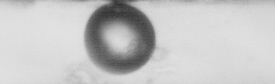

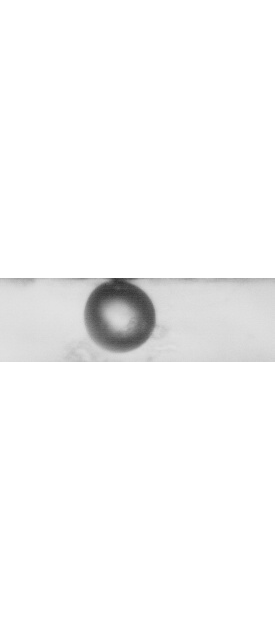

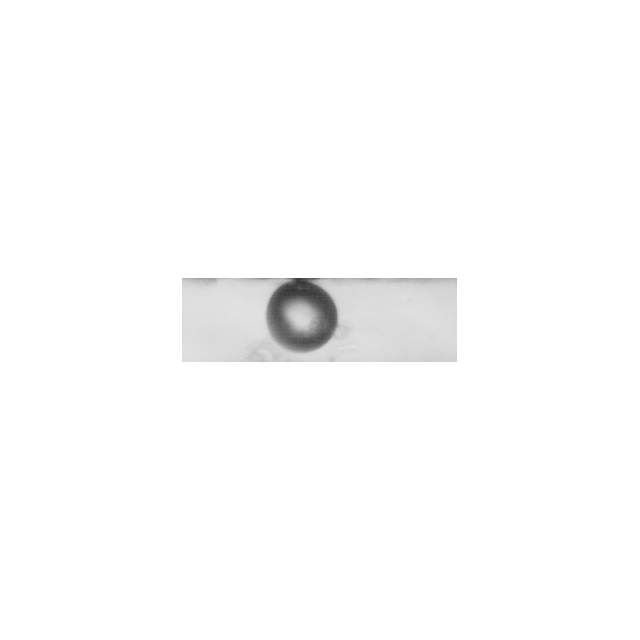

In [115]:
import cv2
import numpy as np

# Загрузка изображения
image = cv2.imread('/content/drive/MyDrive/dataset_nsu_senProj/result_cutted_2/sample_video_img_0000.jpg')

# Проверка, удалось ли загрузить изображение
if image is None:
    raise ValueError("Не удалось загрузить изображение. Проверьте путь к файлу.")

# Определение текущих размеров изображения
height, width = image.shape[:2]

# Заданные размеры
target_width = 275
target_height = 640

# Изменение ширины изображения до 640 пикселей без изменения высоты (растягивание по ширине)
resized_image = cv2.resize(image, (target_width, height), interpolation=cv2.INTER_AREA)

# Создание нового изображения с белым фоном нужного размера
result_image = np.ones((target_height, target_width, 3), dtype=np.uint8) * 255
add_image = np.ones((640, 640, 3), dtype=np.uint8) * 255

# Вычисление отступов для добавления белого поля сверху и снизу
y_offset = (target_height - height) // 2
x_offset = (640 - width) // 2

# Помещаем измененное изображение в центр по вертикали
result_image[y_offset:y_offset + height, :] = resized_image
add_image[:, x_offset:x_offset + width] = result_image

# Сохранение итогового изображения
cv2.imwrite('resized_image_with_top_bottom_padding.png', result_image)
cv2.imwrite('test_yoloPreprocessing.png', add_image)

#result_image1 = np.vstack((result_image, add_image))

# Вывод результата
cv2_imshow(image)
cv2_imshow(result_image)
cv2_imshow(add_image)